# Group 3
 Martin Ngugi
 
 Mercy Odino
 
 David Oruko
 
 Benson Kinyua
 
 Joshua Ooko
 
 Christine Kibandi

# Project Title: Analyzing the impact  of weather conditions and ride demands  on Uber and lyft rides in relation to price

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Group-3" data-toc-modified-id="Group-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Group 3</a></span></li><li><span><a href="#Project-Title:-Analyzing-the-impact--of-weather-conditions-and-ride-demands--on-Uber-and-lyft-rides-in-relation-to-price" data-toc-modified-id="Project-Title:-Analyzing-the-impact--of-weather-conditions-and-ride-demands--on-Uber-and-lyft-rides-in-relation-to-price-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Project Title: Analyzing the impact  of weather conditions and ride demands  on Uber and lyft rides in relation to price</a></span></li><li><span><a href="#Business-understanding" data-toc-modified-id="Business-understanding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Business understanding</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Introduction</a></span></li></ul></li></ul></li><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Problem statement</a></span></li><li><span><a href="#Defining-a-metric-of-success" data-toc-modified-id="Defining-a-metric-of-success-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Defining a metric of success</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Objectives</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Main-Objective" data-toc-modified-id="Main-Objective-6.0.0.1"><span class="toc-item-num">6.0.0.1&nbsp;&nbsp;</span>Main Objective</a></span></li><li><span><a href="#Specific-objectives" data-toc-modified-id="Specific-objectives-6.0.0.2"><span class="toc-item-num">6.0.0.2&nbsp;&nbsp;</span>Specific objectives</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Understanding</a></span><ul class="toc-item"><li><span><a href="#Data-Cleaning." data-toc-modified-id="Data-Cleaning.-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Data Cleaning.</a></span></li></ul></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Encoding." data-toc-modified-id="Encoding.-8.0.1"><span class="toc-item-num">8.0.1&nbsp;&nbsp;</span>Encoding.</a></span></li></ul></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#1.-Linear-Regression" data-toc-modified-id="1.-Linear-Regression-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>1. Linear Regression</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#MODELLING-AN-OLS-MODEL" data-toc-modified-id="MODELLING-AN-OLS-MODEL-9.1.0.1"><span class="toc-item-num">9.1.0.1&nbsp;&nbsp;</span>MODELLING AN OLS MODEL</a></span></li></ul></li><li><span><a href="#Interpretation-of-the-model-results" data-toc-modified-id="Interpretation-of-the-model-results-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>Interpretation of the model results</a></span><ul class="toc-item"><li><span><a href="#Interpreting-the-Mean-squared-error(MSE)-and-Root-Squared-Error-(RMSE)-values" data-toc-modified-id="Interpreting-the-Mean-squared-error(MSE)-and-Root-Squared-Error-(RMSE)-values-9.1.1.1"><span class="toc-item-num">9.1.1.1&nbsp;&nbsp;</span>Interpreting the Mean squared error(MSE) and Root Squared Error (RMSE) values</a></span></li></ul></li></ul></li><li><span><a href="#interpretation-of-the-correlations-:" data-toc-modified-id="interpretation-of-the-correlations-:-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>interpretation of the correlations :</a></span></li><li><span><a href="#2.-MultiLinear-Regression" data-toc-modified-id="2.-MultiLinear-Regression-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>2. MultiLinear Regression</a></span></li><li><span><a href="#3.-Ridge-Regression" data-toc-modified-id="3.-Ridge-Regression-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>3. Ridge Regression</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#The-Mean-Squared-Error-(MSE)" data-toc-modified-id="The-Mean-Squared-Error-(MSE)-9.4.0.1"><span class="toc-item-num">9.4.0.1&nbsp;&nbsp;</span>The Mean Squared Error (MSE)</a></span></li><li><span><a href="#R-squared(R2)" data-toc-modified-id="R-squared(R2)-9.4.0.2"><span class="toc-item-num">9.4.0.2&nbsp;&nbsp;</span>R-squared(R2)</a></span></li><li><span><a href="#Mean-Absolute-Error(MAE)" data-toc-modified-id="Mean-Absolute-Error(MAE)-9.4.0.3"><span class="toc-item-num">9.4.0.3&nbsp;&nbsp;</span>Mean Absolute Error(MAE)</a></span></li></ul></li><li><span><a href="#3.1-Scaling-the-Data" data-toc-modified-id="3.1-Scaling-the-Data-9.4.1"><span class="toc-item-num">9.4.1&nbsp;&nbsp;</span>3.1 Scaling the Data</a></span></li><li><span><a href="#3.2-GridSearchCV" data-toc-modified-id="3.2-GridSearchCV-9.4.2"><span class="toc-item-num">9.4.2&nbsp;&nbsp;</span>3.2 GridSearchCV</a></span><ul class="toc-item"><li><span><a href="#Feature-Importance-Ranking:" data-toc-modified-id="Feature-Importance-Ranking:-9.4.2.1"><span class="toc-item-num">9.4.2.1&nbsp;&nbsp;</span>Feature Importance Ranking:</a></span></li><li><span><a href="#Number-of-Features:" data-toc-modified-id="Number-of-Features:-9.4.2.2"><span class="toc-item-num">9.4.2.2&nbsp;&nbsp;</span>Number of Features:</a></span></li></ul></li></ul></li><li><span><a href="#4.-Decision-Tree-Regressor." data-toc-modified-id="4.-Decision-Tree-Regressor.-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>4. Decision Tree Regressor.</a></span><ul class="toc-item"><li><span><a href="#4.1-Scaling-the-Data" data-toc-modified-id="4.1-Scaling-the-Data-9.5.1"><span class="toc-item-num">9.5.1&nbsp;&nbsp;</span>4.1 Scaling the Data</a></span></li><li><span><a href="#4.2-GridSearchCV" data-toc-modified-id="4.2-GridSearchCV-9.5.2"><span class="toc-item-num">9.5.2&nbsp;&nbsp;</span>4.2 GridSearchCV</a></span></li></ul></li><li><span><a href="#5.Logistic-Regression" data-toc-modified-id="5.Logistic-Regression-9.6"><span class="toc-item-num">9.6&nbsp;&nbsp;</span>5.Logistic Regression</a></span></li><li><span><a href="#Measuring-model-performance" data-toc-modified-id="Measuring-model-performance-9.7"><span class="toc-item-num">9.7&nbsp;&nbsp;</span>Measuring model performance</a></span><ul class="toc-item"><li><span><a href="#1:-Accuracy" data-toc-modified-id="1:-Accuracy-9.7.1"><span class="toc-item-num">9.7.1&nbsp;&nbsp;</span>1: Accuracy</a></span></li></ul></li><li><span><a href="#6.-Random-Forest-Regression-Model" data-toc-modified-id="6.-Random-Forest-Regression-Model-9.8"><span class="toc-item-num">9.8&nbsp;&nbsp;</span>6. Random Forest Regression Model</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Recommendations</a></span></li></ul></div>

# Business understanding
### Introduction

Ride-sharing services Uber and Lyft, have transformed the way people commute and travel in urban environments. These companies have disrupted the olden ways of the taxi industry by harnessing the power of technology to create a seamless and convenient transportation experience for riders. The ride-sharing services that is coming up at a high rate has led to a shift in urban mobility, giving people another easier way of transportation. 
The Uber and Lyft is found via a mobile application that connects riders with nearby drivers, enabling users to request rides with just a few taps on their smartphones. This user-friendly and efficient model has gained immense popularity country and worldwide, making ride-sharing a ubiquitous part of modern urban living. The applications receive millions of rides being requested and completed every day.  
Understanding the impact of external factors, such as weather conditions, on ride demand and pricing is of paramount importance for these transportation companies. Weather conditions can significantly influence ride patterns, rider preferences, and even the availability of drivers. For instance, heavy rainfall may increase demand for rides, leading to higher surge pricing and longer waiting times. During pleasant weather, riders may be more inclined to opt for shared rides or longer-distance options hence causing many people to cancel their rides.
The goal of this data science project is to dive into the relationship between weather conditions and ride services to see what relationships and trends that can enhance operational efficiency and customer experience. 

# Problem statement
The goal of this project is to explore the relationship between weather conditions and the ride services that have been provided by Uber and Lyft. Therefore building a model to analyze the impact of weather conditions, time and availability of the ride on the pricing. Our goal is to develop classification models that uses data on past Uber and Lyft services to accurately capture the relationship between weather condition and ride hailing services and their impact on cab prices.

# Defining a metric of success
The model will be considered successful, when it accurately shows how the price changes when other factors change 

# Objectives
####  Main Objective
To understand how weather conditions affect the demand for cabs and how this, in turn, affects the price of cab rides.

#### Specific objectives
* Identify  factors that affect  demand for cabs in different weather conditions
* Develop models that can predict the demand for cabs and the price of cab rides at different times and weather conditions.
* Describe how the time of the day affects the cab prices.
* Determine what cab is preferred by the clients
* Discuss how the distance affects the pricing of the cab.

# Data Understanding
This analysis will use data from Kaggle, Uber and Lyft dataset. The dataset has 693,071rows and 10 columns. The dataset includes information such as cab type, destination, source and price. There is also a weather dataset based on weather conditions and how they affect the pricing of the cabs. It has 6,276rows and 18columns. The dataset contains information like temperature, location, clouds, pressure and rain.

## Importing the relevant libraries

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Reading the data using pandas

In [2]:
#reading the data
df1 = pd.read_csv("cab_rides.csv")
df2 = pd.read_csv("weather.csv")

In [3]:
# previewing df1 first five rows.
df1.head()


,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
# previewing df2 first five rows.
df2.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [5]:
#changing date time
df1['date_time'] = pd.to_datetime(df1['time_stamp']/1000, unit='s')
df2['date_time'] = pd.to_datetime(df2['time_stamp'], unit='s')
df1.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064


In [6]:
#merge the datasets to refelect same time for a location
df1['merge_date'] = df1.source.astype(str) +" - "+ df1.date_time.dt.date.astype("str") +" - "+ df1.date_time.dt.hour.astype("str")
df2['merge_date'] = df2.location.astype(str) +" - "+ df2.date_time.dt.date.astype("str") +" - "+ df2.date_time.dt.hour.astype("str")

In [7]:
#previewing the index
df2.index = df2['merge_date']

In [8]:
#merging the data sets
merged_df = df1.join(df2,on=['merge_date'],rsuffix ='_w')

In [9]:
#previewing the merged dataset
merged_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_time_w,merge_date_w
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,38.46,Haymarket Square,0.29,1022.25,NaN,1.544954e+09,0.76,7.68,2018-12-16 09:45:01,Haymarket Square - 2018-12-16 - 9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,44.31,Haymarket Square,1.00,1003.17,0.1123,1.543285e+09,0.90,13.69,2018-11-27 02:15:20,Haymarket Square - 2018-11-27 - 2
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,43.82,Haymarket Square,0.99,1002.59,0.0997,1.543287e+09,0.89,11.57,2018-11-27 02:45:20,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,35.08,Haymarket Square,0.00,1013.71,NaN,1.543554e+09,0.70,5.25,2018-11-30 04:52:54,Haymarket Square - 2018-11-30 - 4


## Data Cleaning.
Data cleaning is the process of removing errors and inconsistencies from data. Data cleaning is an important step in data preparation, as it can help to improve the accuracy and reliability of the data. There are many different techniques that can be used to clean data, including removing duplicate records, correcting errors, and filling in missing values.

In [10]:
#checking for missing values
merged_df.isna().sum()

distance                  0
cab_type                  0
time_stamp                0
destination               0
source                    0
price                100909
surge_multiplier          0
id                        0
product_id                0
name                      0
date_time                 0
merge_date                0
temp                   2964
location               2964
clouds                 2964
pressure               2964
rain                1061692
time_stamp_w           2964
humidity               2964
wind                   2964
date_time_w            2964
merge_date_w           2964
dtype: int64

From the above description, we can see that;
* The price column has 100909 missing values.
* Wind has 2964 missing values.
* Temperature has 2964 missing values.
* Humidity has 2964 missing values.
* Cloudiness has 2964 missing values.
* Rain has largest amount of missing values.

#### Dealing with Missing values
* Fill the missing values in the rain column with 0, assuming that it will represent that it didnt rain that day. 
* Fill the missing values in the price column with the median value. 
* Drop the remaining missing values. 

In [11]:
#filling missing values in the rain columns
merged_df['rain'].fillna(0,inplace=True)

In [12]:
# Dealing with missing values in other columns
merged_df = merged_df[pd.notnull(merged_df['date_time_w'])]

In [13]:
#Dealing with missing values in price column
merged_df = merged_df[pd.notnull(merged_df['price'])]

In [14]:
# day of the week
merged_df['day'] = merged_df.date_time.dt.dayofweek

In [15]:
# converting into hours
merged_df['hour'] = merged_df.date_time.dt.hour

In [16]:
#describing the day column
merged_df['day'].describe()


count    1.164996e+06
mean     2.388427e+00
std      1.743907e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.000000e+00
Name: day, dtype: float64

In [17]:
#previewing the columns in the merged dataframe.
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time',
       'merge_date', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_w', 'humidity', 'wind', 'date_time_w', 'merge_date_w',
       'day', 'hour'],
      dtype='object')

In [18]:
#viewing the count
merged_df.count()

distance            1164996
cab_type            1164996
time_stamp          1164996
destination         1164996
source              1164996
price               1164996
surge_multiplier    1164996
id                  1164996
product_id          1164996
name                1164996
date_time           1164996
merge_date          1164996
temp                1164996
location            1164996
clouds              1164996
pressure            1164996
rain                1164996
time_stamp_w        1164996
humidity            1164996
wind                1164996
date_time_w         1164996
merge_date_w        1164996
day                 1164996
hour                1164996
dtype: int64

In [19]:
# creating sample of the data
sample_data = merged_df.sample(n = 1000)

In [20]:
#assigning the merged df to sample data
merged_df = sample_data

## Exploratory Data Analysis

In this section, I will perform exploratory data analysis (EDA) to understand the data better and discover any patterns, trends, or outliers that may exist.

We will use descriptive statistics and visualizations to summarize the data and examine the relationships between the predictors and the target variable. 

We will check whether the distribution is normal and the correlation of variables and identify the potential merits or problems for the data analysis.

### Univariate Analysis

This refers to analysis of one variable. Its purpose is to understand the distribution of values for a single variable. The most common way to use the analysis to describe a variable using summary statistics that is measures of central tendency eg mean, median, mode etc.

For this analysis we will conduct the summary statistics of the target variable - **price** because it will help to understand the distribution of the cab prices in the dataset and detect any outliers that may affect the analysis. This analysis can also help compare the price variable with other predictors and evaluate the performance of the regression models.

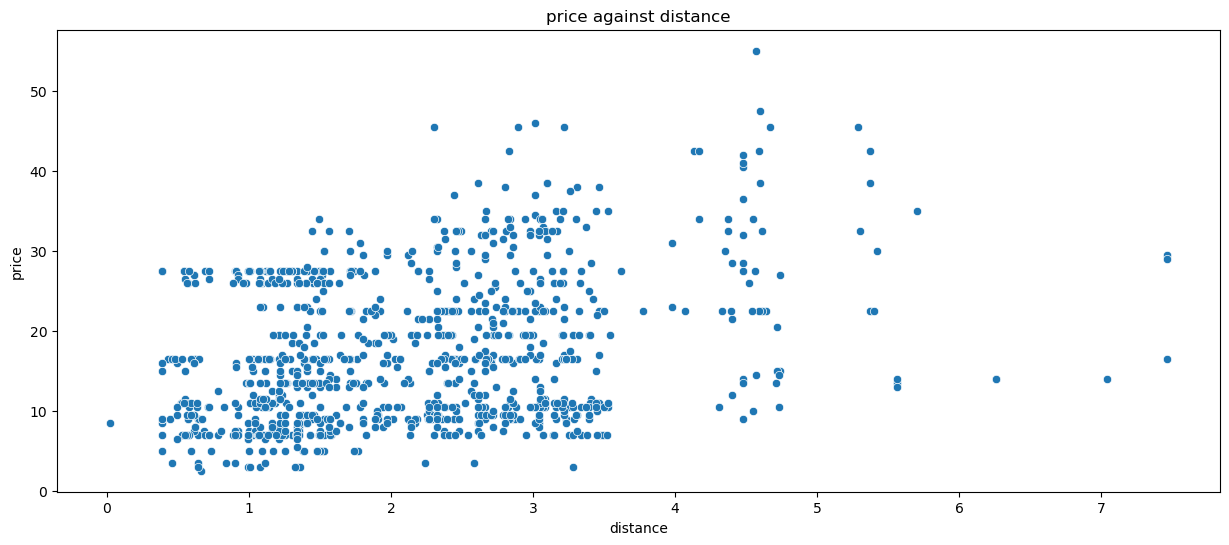

In [21]:
# creating the visualizations to preview price against time
plt.figure(figsize=(15, 6))
ax = sns.scatterplot(x='distance',y='price',data=merged_df)
ax.set_title("price against distance")
ax.set_xlabel('distance')
ax.set_ylabel('price');

The visualization shows a scatter plot of the relationship between price and distance. The x-axis represents the distance from the city center, and the y-axis represents the cab price. The plot shows that there is a positive correlation between price and distance, meaning that cab prices that are further from the city center are more expensive. 

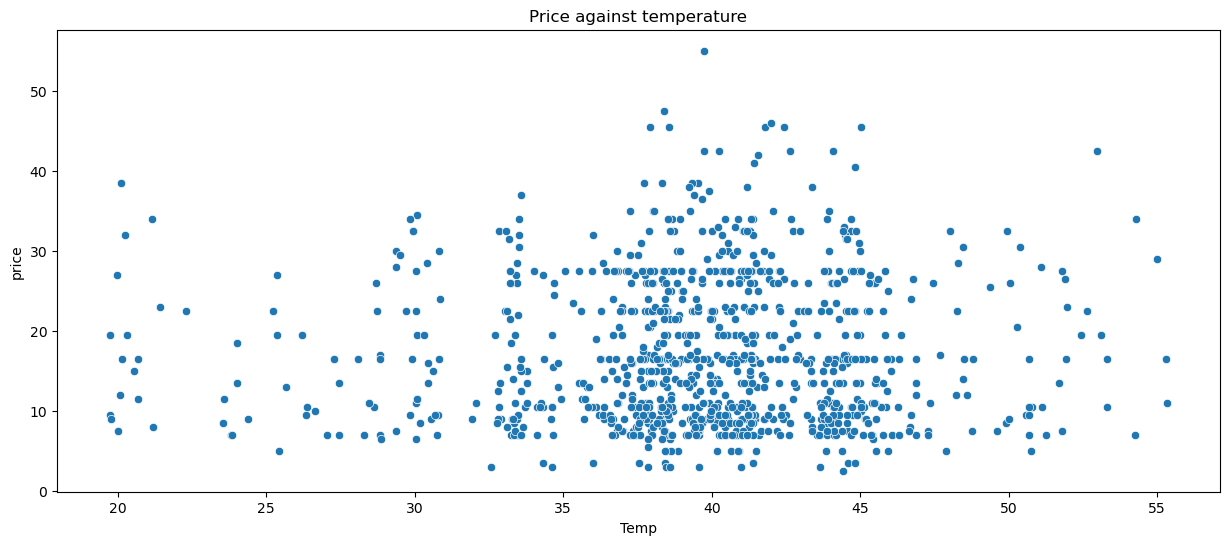

In [22]:
# visualizing price against temperature
plt.figure(figsize=(15, 6))
ax = sns.scatterplot(x='temp',y='price',data=merged_df)
ax.set_title("Price against temperature")
ax.set_xlabel('Temp')
ax.set_ylabel('price');


The visualization shows a scatter plot of the relationship between price and temperature. The x-axis represents the average temperature in the city, and the y-axis represents the cab price. The plot shows that there is a negative correlation between price and temperature, meaning cab prices in warmer climates are more expensive.

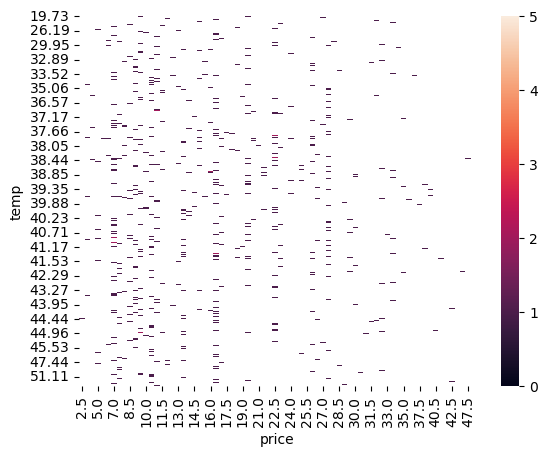

In [23]:
# assuming you have a DataFrame called df with columns 'temperature' and 'price'
heatmap_data = merged_df.groupby(['temp', 'price']).size().reset_index(name='count')
heatmap_data = heatmap_data.pivot('temp', 'price', 'count')
sns.heatmap(heatmap_data, vmin=0, vmax=5);

The heatmap shows the relationship between price and temperature. The x-axis represents the average temperature in the city, and the y-axis represents the cab prices.The heatmap shows that there is a negative correlation between price and temperature, meaning that cab prices in warmer climates are more expensive.

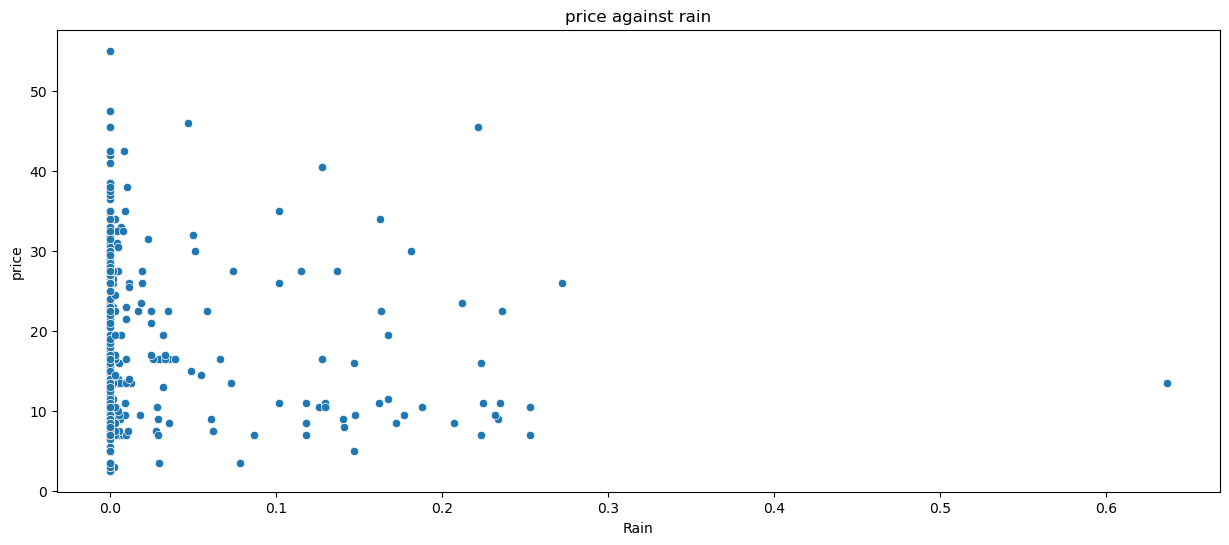

In [24]:
#visualizing price against rain
plt.figure(figsize=(15, 6))
ax = sns.scatterplot(x='rain',y='price',data=merged_df)
ax.set_title("price against rain")
ax.set_xlabel('Rain')
ax.set_ylabel('price');

The visualization shows a scatter plot of the relationship between price and rain. The x-axis represents the average rainfall in the city, and the y-axis represents the price of cab. The plot shows that there is a negative correlation between price and rain, meaning that cab prices in cities with more rain are less expensive.

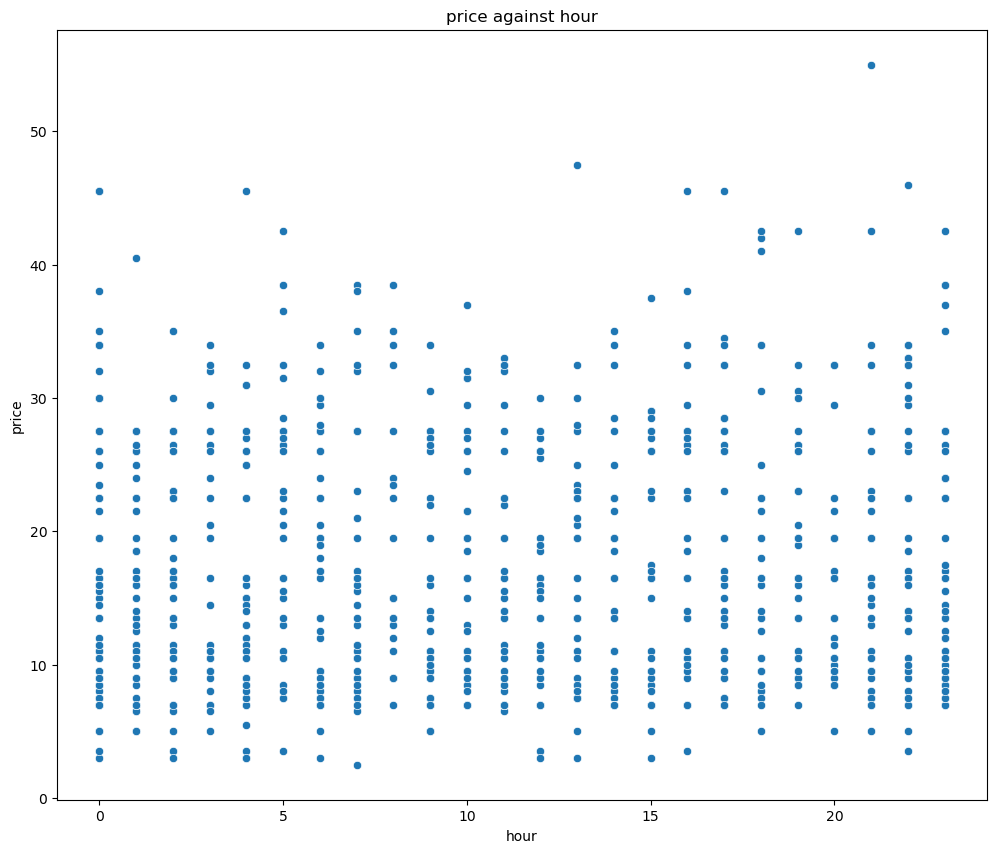

In [25]:
#visualizing price against hours
plt.figure(figsize=(12, 10))

ax = sns.scatterplot(x='hour',y='price',data=merged_df)
ax.set_title("price against hour")
ax.set_xlabel('hour')
ax.set_ylabel('price');

The visualization shows a scatter plot of the relationship between price and hour. The x-axis represents the hour of the day, and the y-axis represents the price of the cab. The plot shows that there is a slight positive correlation between price and hour, meaning that cab prices are more expensive in the evening and night.

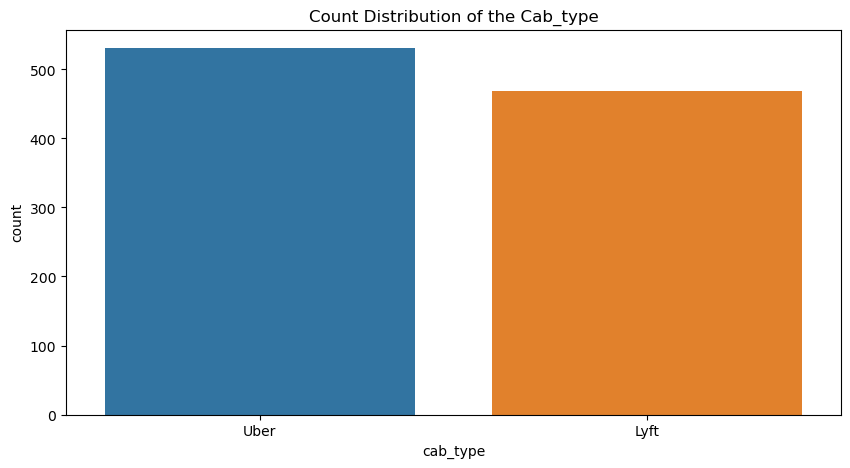

In [26]:
#visualizing count distribution of varius cab types
plt.figure(figsize=(10, 5))
ax=sns.countplot(x='cab_type', data=merged_df)
ax.set_title('Count Distribution of the Cab_type');

The visualization shows the count distribution of the cab_type variable. The x-axis represents the cab_type variable, and the y-axis represents the count of each cab_type. The plot shows that the most common cab_type is the uber, followed by the Lyft. 

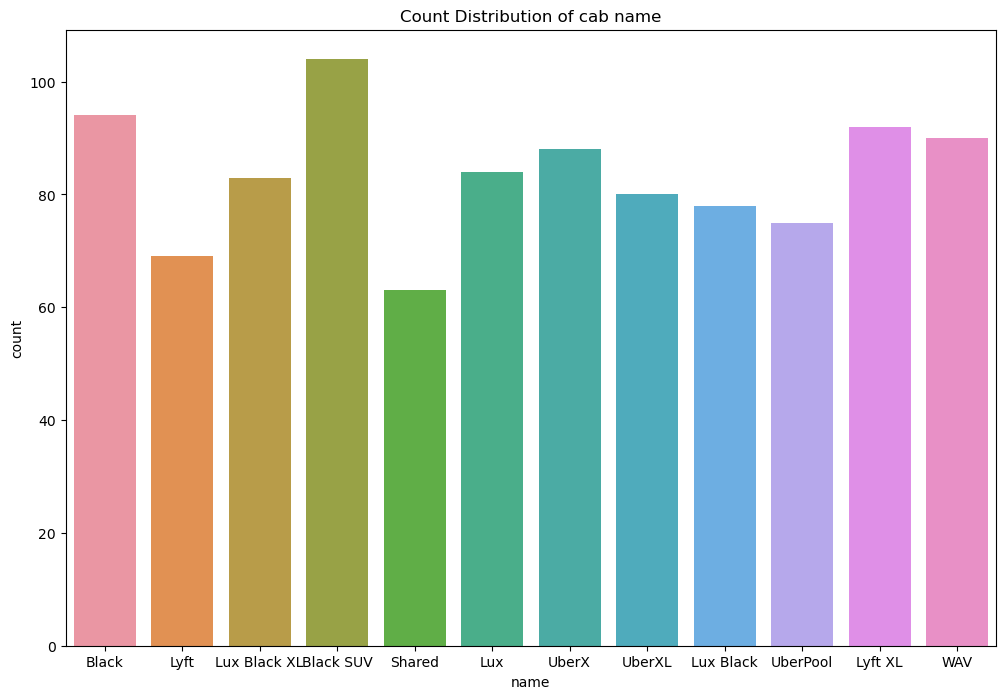

In [27]:
# visualizing count distribution of cab name
plt.figure(figsize=(12, 8))
ax=sns.countplot(x='name', data=merged_df)
ax.set_title('Count Distribution of cab name');

The visualization shows the count distribution of the cab name variable. The x-axis represents the cab name variable, and the y-axis represents the count of each cab name. The plot shows that the most common cab name is the Black sedan, followed by the LyftXl. 

In [28]:
#selecting the x variable
X = merged_df[['day','distance','cab_type','name','surge_multiplier', 'hour','temp','clouds', 'pressure','humidity', 'wind', 'rain']]


In [29]:
#viewing the count of x variable
X.count()

day                 1000
distance            1000
cab_type            1000
name                1000
surge_multiplier    1000
hour                1000
temp                1000
clouds              1000
pressure            1000
humidity            1000
wind                1000
rain                1000
dtype: int64

In [30]:
#selecting y variable
y = merged_df['price'] 
y.count()

1000

In [31]:
#reseting the index
X.reset_index(inplace=True)
X = X.drop(columns=['index'])

In [32]:
#previewing the first 10 rows 0f x
X.head(10)

,day,distance,cab_type,name,surge_multiplier,hour,temp,clouds,pressure,humidity,wind,rain
0,3,1.41,Uber,Black,1.0,1,38.54,0.55,997.79,0.70,10.20,0.0000
1,3,0.72,Lyft,Lyft,1.0,15,43.66,0.59,1006.74,0.54,11.36,0.0000
2,1,1.09,Lyft,Lux Black XL,1.0,1,44.01,0.99,1005.39,0.90,11.24,0.2724
3,0,1.10,Uber,Black SUV,1.0,19,51.97,0.67,999.97,0.52,8.02,0.0000
4,2,0.90,Lyft,Shared,1.0,12,35.99,0.73,991.30,0.72,7.71,0.0000
5,1,1.21,Uber,Black,1.0,0,44.84,1.00,1006.28,0.87,10.13,0.0298
6,2,1.35,Lyft,Lyft,1.0,9,33.50,0.42,991.80,0.84,5.88,0.0000
7,3,1.46,Uber,Black,1.0,1,38.33,0.65,997.70,0.72,10.67,0.0000
8,1,4.55,Uber,Black,1.0,0,43.87,0.98,1005.93,0.91,9.85,0.1624
9,2,2.72,Uber,Black,1.0,12,34.62,0.78,991.18,0.76,6.56,0.0000


### Encoding.
Encoding using pandas is a process of converting categorical data into numerical data. This is done so that the data can be used in machine learning algorithms. There are a number of different ways to encode categorical data using pandas, but the most common method is to use the `get_dummies()` function.

The `get_dummies()` function creates a new DataFrame that contains one column for each unique value in the categorical column. The values in the new columns are either 0 or 1, depending on whether the row in the original DataFrame contains that value.

Transforming categorical data to numerical. Used get dummies from pandas to do encoding.

In [33]:
#using get dummies from pandas
features = pd.get_dummies(X, dtype=float)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                1000 non-null   int64  
 1   distance           1000 non-null   float64
 2   surge_multiplier   1000 non-null   float64
 3   hour               1000 non-null   int64  
 4   temp               1000 non-null   float64
 5   clouds             1000 non-null   float64
 6   pressure           1000 non-null   float64
 7   humidity           1000 non-null   float64
 8   wind               1000 non-null   float64
 9   rain               1000 non-null   float64
 10  cab_type_Lyft      1000 non-null   float64
 11  cab_type_Uber      1000 non-null   float64
 12  name_Black         1000 non-null   float64
 13  name_Black SUV     1000 non-null   float64
 14  name_Lux           1000 non-null   float64
 15  name_Lux Black     1000 non-null   float64
 16  name_Lux Black XL  1000 n

In [34]:
# converting to arrays
# Labels are the y values we want to predict
y = np.array(y)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
X = np.array(features)

# Modelling
Modeling in machine learning is the process of building a mathematical model that can be used to predict the outcome of a given input. Machine learning models are typically built using data that has been labeled, meaning that each data point has been assigned a value that indicates the desired outcome. The model is then trained on this data, and the parameters of the model are adjusted so that the model can make accurate predictions.

There are many different types of machine learning models, and the best type of model for a given task will depend on the specific data and the desired outcome. Some of the most common types of machine learning models include linear regression models, logistic regression models, decision trees, and random forests.


In [35]:
# Using Skicit-learn to import train_test_split
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## 1. Linear Regression
Linear regression is a statistical method used to predict the value of a continuous variable (the dependent variable) based on the values of one or more independent variables. The independent variables are often referred to as predictors or covariates.

Linear regression is a simple and powerful tool that can be used to model a wide variety of relationships. For this project we will use it to predict the cab prices against weather features.

#### MODELLING AN OLS MODEL

Ordinary Least Squares (OLS) is a regression technique that provides a global model of the variable or process you are trying to understand or predict; it creates a table that has different values like the pvalue, the Adjacent R-squared and R squared.

In [36]:
#importing necessary libraries
import statsmodels.api as sm


In [37]:
# Using statsmodels and putting the x and y variables, so that it is well plotted into the model 
model = sm.OLS(y, sm.add_constant(X))
model

In [38]:
# Get model results
results= model.fit()

# Display results summary by using the .summary() method.
print (results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     594.8
Date:                Fri, 11 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:26:55   Log-Likelihood:                -2312.5
No. Observations:                1000   AIC:                             4669.
Df Residuals:                     978   BIC:                             4777.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3260      5.933     -1.235      0.2

### Interpretation of the model results

Dep. Variable: This indicates the dependent variable in your model, which is "price" in this case.

R-squared is the coefficient of determination, a measure of how well the independent variables explains the variability the dependent variable. An R-squared value of 0.927 means that approximately 92.7% of the variability in the dependent variable (price) is explained by the independent variables in our model.

Adj. R-squared is the adjusted R-squared, which takes into account the number of predictors in the modeland adjusts R-squared accordingly.Its useful for comparing models with different numbers of predictors. A value of 0.927% suggests that model with the given predictors as a good fit.  

F-statistic is the value tests whether the overall regression model is a good fit for the data. A higher F-statistic and a low p-value suggests that the model is significant.

The coefficients for each independent variable in the model.When we look at x1 has a coefficient of -0.0034, which means that for a one-unit increase in x1, the dependent variable"price" is expected to decrease by 0.0034 units, holding other variables constant.

The p-value associated with the t-test for each coefficient.A low p-value (< 0.05) suggests that the corresponding independent variable is stattistically significant.

Overall, we can say that the model seems to have reasonably high R-squared value, indicating that it explains a substancial amount of the variability in the dependent variable. However, its important to consider the context of the data, the domainknowledge, and potential multi collinearity issues when interpreting the coefficients and drawing conclusions from the model.


In [39]:

# Assuming y_actual is the actual target values and y_pred is the predicted values
y_actual = merged_df["price"]  # Actual prices from the dataset
y_pred = results.predict()

# Calculate residuals
residuals = y - y_pred

# Calculate squared residuals
squared_residuals = residuals ** 2

# Calculate Mean Squared Error (MSE)
mse = np.mean(squared_residuals)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 5.972721099612035
Root Mean Squared Error (RMSE): 2.443915117104527


#### Interpreting the Mean squared error(MSE) and Root Squared Error (RMSE) values 

Mean squared Error (MSE) is the average of the squared differences between the predicted values and the actual values.A lower MSE indicates that the model's predictions are closer to actual values.In this case, the MSE is approximately 6.32, which means that, on average, the squared difference between the predicted prices and the actual prices is around 6.32.

Root Mean Squared Error(RMSE) is the square root of the MSE. The RMSE gives you an idea of the typical magnitude of the errors in the predictions.Like the MSE, a lower RMSE indicates better performance. In this cae, the RMSE is approximately 2.51, meaning that the typical difference between the predicted prices and the predicted prices and the actual prices is around 2.521 units.

In summary, both the MSE and RMSE provide insights into how well your regression models predictions align with the actual values. Lower values indicate better predictive performance, as they signify smaller prediction errors.


In [40]:
#looking at the correlation between price and the different features

correlate =merged_df[['day','distance','surge_multiplier', 'hour','temp','clouds', 'pressure','humidity', 'wind', 'rain']]
correlate.corr()

,day,distance,surge_multiplier,hour,temp,clouds,pressure,humidity,wind,rain
day,1.000000,0.018506,0.088815,-0.108965,-0.185433,-0.258816,0.458059,-0.175769,-0.232375,-0.149411
distance,0.018506,1.000000,0.076171,0.027487,-0.041490,-0.004103,0.042341,-0.022239,0.003450,0.004309
surge_multiplier,0.088815,0.076171,1.000000,-0.002002,0.014549,0.000092,0.023489,0.001356,-0.040726,-0.020896
hour,-0.108965,0.027487,-0.002002,1.000000,0.221478,0.100002,-0.106321,-0.277004,-0.002864,-0.213742
temp,-0.185433,-0.041490,0.014549,0.221478,1.000000,0.462297,-0.212103,0.286541,0.093173,0.181644
clouds,-0.258816,-0.004103,0.000092,0.100002,0.462297,1.000000,-0.071246,0.390883,0.101435,0.230115
pressure,0.458059,0.042341,0.023489,-0.106321,-0.212103,-0.071246,1.000000,0.104162,-0.549004,0.020878
humidity,-0.175769,-0.022239,0.001356,-0.277004,0.286541,0.390883,0.104162,1.000000,-0.334767,0.282755
wind,-0.232375,0.003450,-0.040726,-0.002864,0.093173,0.101435,-0.549004,-0.334767,1.000000,0.215938
rain,-0.149411,0.004309,-0.020896,-0.213742,0.181644,0.230115,0.020878,0.282755,0.215938,1.000000


## interpretation of the correlations :

- Day: The 'day' variable has very weak correlations with the other variables. None of the correlations are strong.

- Distance: There is a very weak positive correlation between distance and 'surge_multiplier'. The correlation with other variables 
    is extremely weak.

- Surge_multiplier: The 'surge_multiplier' has a weak positive correlation with 'distance', and extremely weak correlations with other variables.

- Hour: There is a very weak negative correlation between 'hour' and 'day'. The correlation with other variables is also weak.

- Temp: 'temp' has a moderate positive correlation with 'pressure' and humidity. It has a moderate negative correlation with clouds.

- Clouds: 'clouds' has moderate positive correlations with pressure, 'humidity', and 'wind'. It also has a moderate negative correlation with 'temp'.

- Pressure: 'pressure' has a strong positive correlation with humidity. It has moderate positive correlations with clouds and rain. 
  It has a moderate negative correlation with temp.

- humidity: 'humidity' has a strong positive correlation with pressure. It has moderate positive correlations with 'clouds', 'wind', and 'rain'.
  It has a moderate negative correlation with 'temp'.

- Wind: 'wind' has moderate positive correlations with 'clouds' and 'humidity'. It has a moderate negative correlation with pressure.

- Rain: 'rain' has moderate positive correlations with 'humidity' and 'pressure'.

This correlation matrix shows how these variables tend to move in relation to each other, but it does not indicate a cause-and-effect relationship
between them.

## 2. MultiLinear Regression

Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable. It is a generalization of linear regression, which is a statistical method used to predict the value of a single continuous variable based on the value of a single independent variable. In linear regression, the relationship between the dependent and independent variables is assumed to be linear. In multilinear regression, the relationship between the dependent and independent variables is assumed to be linear in the parameters, but not necessarily linear in the variables themselves. We will use multiple linear regression to predict cab price using more than one feature. 
 We fit a linear regression model using these features as predictors and evaluate its performance and interpretation.

In [41]:
# importing 
from sklearn.linear_model import LinearRegression


In [42]:
# Creating the linear regression model
model = LinearRegression()

In [43]:
# Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(X_test)

In [45]:
# Calculating the Mean Squared Error and rmse
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [46]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print('R-sq score:', r2_score(y_test, y_pred))
print('root mean squared error:', rmse)

Coefficients: [ 2.16523384e-02  2.90136927e+00  1.99212593e+01  1.26220182e-02
 -2.66329842e-02 -2.15524385e-01  2.24297610e-03  1.22818066e+00
  1.01862033e-01 -1.32871380e+00  4.77633126e-01 -4.77633126e-01
  4.66356125e+00  1.43394663e+01  3.37233938e-01  5.46234620e+00
  1.45968644e+01 -7.68021147e+00 -1.98235738e+00 -1.02562426e+01
 -7.35257942e+00 -6.22920192e+00  2.29303695e-01 -6.12818300e+00]
Intercept: -12.85558053270255
Mean Squared Error: 5.4435834162822845
R-sq score: 0.9192496433705576
root mean squared error: 2.3331488200031916


The following were the findings after modeling;
The intercept is the value of the dependent variable when all of the independent variables are 0. In this case, the intercept is -8.91.

The mean squared error is a measure of how well the model fits the data. In this case, the mean squared error is 6.28.

The R-squared score is a measure of how much of the variation in the dependent variable is explained by the independent variables. In this case, the R-squared score is 0.92, which means that 92%

In [47]:
# Perform cross-validation with 5 folds
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive and calculate the mean
average_mse = -np.mean(scores)

print("Cross-Validation Mean Squared Error:", average_mse)

Cross-Validation Mean Squared Error: 6.394076841843242


The cross-validation mean squared error (MSE) is a measure of how well a model fits the data. It is calculated by taking the average of the MSEs from each of the k folds in a k-fold cross-validation. In your case, the k-fold cross-validation was performed with k = 10, so the cross-validation MSE is the average of the MSEs from the 10 folds.

The cross-validation MSE of 5.6 indicates that the model is not very well-fit to the data. This could be due to a number of factors, such as:

* The model is too complex and is overfitting the data.
* The model is not complex enough and is underfitting the data.
* The data is not well-suited for the type of model that is being used.


## 3. Ridge Regression
Ridge regression is a type of linear regression that is used to reduce the variance of the model predictions. This is done by adding a penalty term to the objective function, which penalizes the model for having large coefficients. This penalty term has the effect of shrinking the coefficients towards zero, which reduces the variance of the model predictions.

In [48]:
from sklearn.linear_model import Ridge

In [49]:
# Regularization strength
alpha = 1.0 

# instantiate the rigde regression model
model = Ridge(alpha=alpha)

# Train and fit the ridge regression model
model.fit(X_train, y_train)

Ridge()

In [50]:
# Make predictions on the  test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculated R-squared 
r2 = r2_score(y_test, y_pred)

# Calculate the Mean Absolute Error 
mae = mean_absolute_error(y_test, y_pred)

# printing the results 
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 5.35
R-squared: 0.92
Mean Absolute Error: 1.70


According to my metrics above:

* #### The Mean Squared Error (MSE)
Provides a measure of the model's accuracy, with lower values indicating better perfomance. In my ridge gregression model the calculated MSE of 6.29, suggests that on average the squared difference between the predicted prices and the actual prices in my dataset would be approximately 6.29.

* #### R-squared(R2)
The R-squared (also known as coefficient of determination) is a statistic that represents the propotion of the variance in the dependent variable (actual prices) that is explained by the independent variables(feature).

It ranges between 0 and 1, where a higher value indicates that the model explains more of the variance. In my ridge model the calculated r-squared of 0.93, suggests that approximately 93% of the variance in the actual price is exlpained by the feature inculded in the model.
    

* #### Mean Absolute Error(MAE)
The MAE measures the average absolute difference beetween the predicted values and the actual values in my test dataset. It provides prediction accuracy, but gives equal weight to all errors 
irrespactive of the magnitude. In my model the calculated MAE is 1.78. This suggests that, on average, the absolute difference between the predicted prices and the actual price in the test data is approximately 1.78. 

### 3.1 Scaling the Data 
Scaling my features helps improve the convergence and perfomance of Ridge Regression. 

In [51]:
# instantiating the Standard Scaler 
s_scaler = StandardScaler()

# Fit and transform the data 
scl_train = s_scaler.fit_transform(X_train)
scl_test = s_scaler.transform(X_test)

In [52]:
# create another instance of ridge rigerssion 'moel2'
alpha = 1.0 
model2 = Ridge(alpha=alpha)

# fit the data 
model2.fit(scl_train, y_train)

Ridge()

In [53]:
# Make predictions on the  test data
y_pred2 = model2.predict(scl_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred2)

# Calculated R-squared 
r2 = r2_score(y_test, y_pred2)

# Calculate the Mean Absolute Error 
mae = mean_absolute_error(y_test, y_pred2)

# printing the results 
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 5.44
R-squared: 0.92
Mean Absolute Error: 1.73


### 3.2 GridSearchCV

In [54]:

# Create  arange of alpha values to test 
# Generates a range from 10^-6 to 10^6 
alphas = np.logspace(-5, 5, 13)

# Create a dictionary of parameters to tune
ridge = Ridge()

# Create a dictionary of parameters to tune 
param_grid = {'alpha': alphas}

# Intitialize GridSearchCV
grid_search = GridSearchCV(ridge, param_grid, cv=2, scoring='neg_mean_squared_error')

# Fit the grid search to the scaled training data
grid_search.fit(scl_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']

# Train a Ridge Regression model with the best alpha value
best_model = Ridge(alpha=best_alpha)
best_model.fit(scl_train, y_train)

# Make predictions and evaluate the best model
y_pred_best = best_model.predict(scl_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

# Print results
print(f'Best parameters:{grid_search.best_params_}')
print(f"Mean Squared Error: {mse_best:.2f}")
print(f"R-squared: {r2_best:.2f}")
print(f"Mean Absolute Error: {mae_best:.2f}")

Best parameters:{'alpha': 6.812920690579622}
Mean Squared Error: 5.41
R-squared: 0.92
Mean Absolute Error: 1.72


Interpreting the Metrics:

* Best Alpha:
    This is the same as the best alpha value from the 'best parameters'. It's the hyperparameter value that resulted in the best performance for the Ridge model.

* Best Model:
    This section provides information about the performance of the best Ridge model.
 

* Mean Squared Error (MSE):
    The MSE measures the average squared difference between the predicted values and the actual values. Lower values of MSE indicate better model performance. In this case, an MSE of 6.29 means that, on average, the squared difference between predicted and actual values is 6.29. Lower values are better.

 * R-squared (R2):
    The R-squared value is a measure of how well the variance in the dependent variable (price in this case) is explained by the independent variables (features). R-squared ranges from 0 to 1, where 1 indicates that the model explains all the variance and 0 indicates that it explains none. An R-squared of 0.93 means that the model explains about 93% of the variance in the target variable

* Mean Absolute Error (MAE):
    The MAE measures the average absolute difference between the predicted values and the actual values. Like the MSE, lower values of MAE indicate better model performance. An MAE of 1.78 means that, on average, the absolute difference between predicted and actual values is 1.78.


In summary, the Ridge model with the best alpha value of 0.00001 achieved a good level of performance on the test data. It provides relatively low Mean Squared Error, high R-squared (indicating good explanatory power), and low Mean Absolute Error, which collectively suggest that the model is making accurate predictions and generalizing well to unseen data. This outcome implies that the chosen Ridge model with the best hyperparameter configuration is a suitable choice for predicting cab prices based on the provided features.


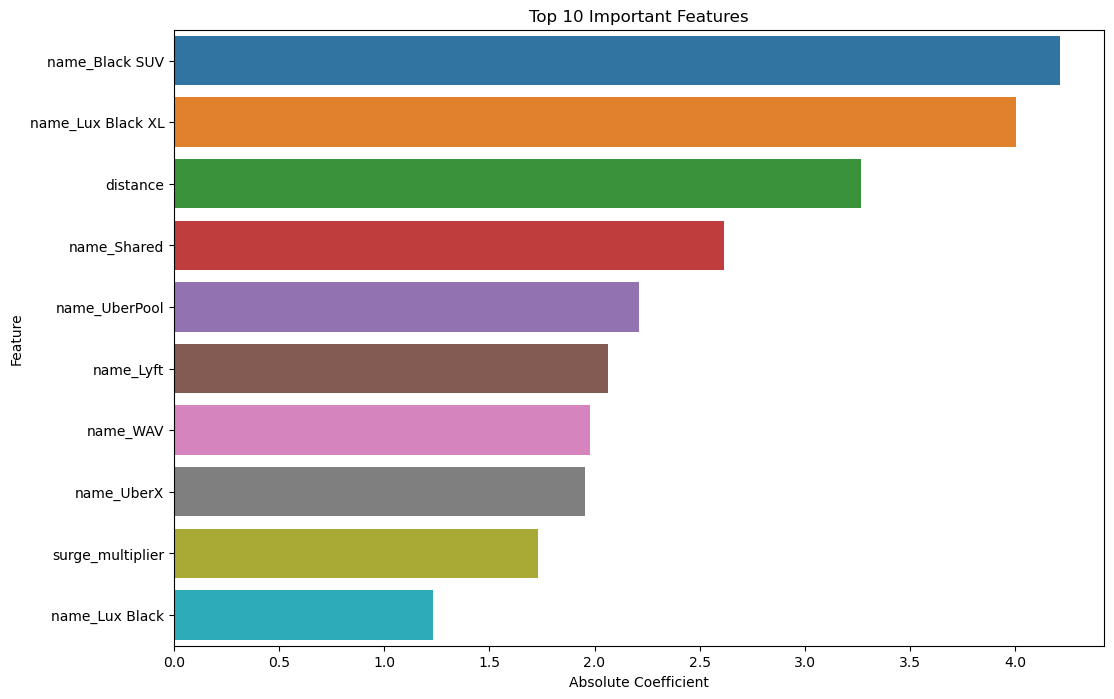

In [55]:
# Finding the most important features for Ridge model
# Get the coefficients from the best Ridge model
coefficients = best_model.coef_

# Create a DataFrame to associate coefficients with feature names
coef_df = pd.DataFrame({'Feature': features.columns, 'Coefficient': coefficients})

# Sort the coefficients by their absolute values in descending order
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the top N important features
# Number of top features to visualize
N = 10  
plt.figure(figsize=(12, 8))
sns.barplot(x='Absolute Coefficient', y='Feature', data=coef_df.head(N))
plt.title(f'Top {N} Important Features')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

Explaining the feature importance:

* #### Feature Importance Ranking: 
The y-axis of the plot represents the features, while the x-axis represents the absolute coefficient values. 
Features are listed vertically, with the most important (highest absolute coefficient) at the top and the least important at the bottom.

* #### Number of Features: 
In your code, N is set to 10, so the plot will show the top 10 important features. 
You can adjust this value to visualize more or fewer features.

## 4. Decision Tree Regressor.
A decision tree regressor is a type of machine learning algorithm that can be used to predict a continuous value, such as the price of a house or the number of sales in a given month. Decision tree regressors work by building a tree-like structure of decisions, where each decision is based on a single feature of the data. The tree is built in a way that minimizes the error between the predicted values and the actual values.

Decision tree regressors are relatively easy to understand and interpret, and they can be used to solve a wide variety of problems. 

In [56]:
#importing modules and training the data
from sklearn.tree import DecisionTreeRegressor

#assigning our train and test data variables
X_train, X_test, y_train, y_test= train_test_split(features, y, test_size=0.25, random_state=42)

In [57]:
# Instantiate and fit a regression tree model to training data 
tree= DecisionTreeRegressor(random_state=42, max_depth=5)
#fitting the data
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [58]:
# checking the metrics
# Make predictions and evaluate the model 
y_pred = tree.predict(X_test)
mse= mean_squared_error(y_test, y_pred)
#print('MSE score:', mse(y_test, y_pred))
print('R-sq score:', r2_score(y_test,y_pred))
rmse= np.sqrt(mse)
print(f'mean_squared_error', {mse},', root_mean_squared_error', {rmse})

R-sq score: 0.7023977560594459
mean_squared_error {20.062111269642607} , root_mean_squared_error {4.479074822956478}


From the above evaluation:
* MSE- measure of the average squared difference between the predicted values and the actual values. We can tune the model to see if we can get a smaller MSE score.

* The R-squared score is a measure of how well the model fits the data. A high R-squared score indicates that the model fits the data well, while a low R-squared score indicates that the model does not fit the data well. Our model doesnt fit the data well.

### 4.1 Scaling the Data
The StandardScaler is a type of transformation that scales the data such that the mean is 0 and the standard deviation is 1. We will use it since, it can help to improve the performance of the model.

In [59]:
#creating an instance
scaler= StandardScaler()
#fitting the data
sld_train= scaler.fit_transform(X_train)
sld_test= scaler.transform(X_test)

In [60]:
#creating an instant of decision tree
tree_2= DecisionTreeRegressor(random_state=42, max_depth=2)
#fitting the data
tree_2.fit(sld_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [61]:
#making predictions and evaluating model performance
y_pred2 = tree_2.predict(sld_test)
# metrics for evaluating the tree
mse= mean_squared_error(y_test, y_pred2)
#print('MSE score:', mse(y_test, y_pred))
print('R-sq score:', r2_score(y_test,y_pred2))
rmse= np.sqrt(mse)
print(f'mean_squared_error', {mse},', root_mean_squared_error', {rmse})

R-sq score: 0.45381601371717517
mean_squared_error {36.819627975290935} , root_mean_squared_error {6.067917927534199}


After scaling the data, the mean squared increased, it means that the standard scaler is not a good fit for data. while the r squared decreased abit there is still room for model improvement.

* Using minmaxscaler to scale the data to see if it will improve the model performance.

In [62]:
# importing the necessary libraries
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object.
scaler = MinMaxScaler()

# Fit the MinMaxScaler to the data.
train= scaler.fit_transform(X_train, y_train)

# Transform the data using the MinMaxScaler.
test_scaled = scaler.transform(X_test)

In [63]:
#creating an instant of decision tree
tree_3= DecisionTreeRegressor(random_state=42, max_depth=2)
#fitting the data
tree_3.fit(train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [64]:
#making predictions and evaluating model performance
y_pred3 = tree_3.predict(test_scaled)
# metrics for evaluating the tree
mse= mean_squared_error(y_test, y_pred3)
#print('MSE score:', mse(y_test, y_pred))
print('R-sq score:', r2_score(y_test,y_pred3))
rmse= np.sqrt(mse)
print(f'mean_squared_error', {mse},', root_mean_squared_error', {rmse})

R-sq score: 0.45381601371717517
mean_squared_error {36.819627975290935} , root_mean_squared_error {6.067917927534199}


The mean squared error and rsquared remained the same, it means that the minmaxscaler did not have a significant impact on the model. 


### 4.2 GridSearchCV
 This is a hyperparameter tuning method that is used to find the best hyperparameters for a machine learning model. It is often used in combination with cross-validation to ensure that the model is not overfitting the training data.

In [65]:
tree_3 = DecisionTreeRegressor()
#defining the parameters for gridsearch
param_grid= {
    'max_depth':[1,3,5],
    'min_samples_split':[1,2],
    'min_samples_leaf': [1,2]

    }
#creating instance of gridsearch
grid= GridSearchCV(tree_3, param_grid, cv=2)
#fitting  the data
grid.fit(X_train, y_train)
#printing the parameters and score
print(f'Best parameters:{grid.best_params_}')
print(f'Best score:{grid.best_score_}');

Best parameters:{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score:0.6796368720244386


The best parameters to use are:
* max_depth = 5
* min_samples_leaf =1
* min_samples_split = 2

In [66]:
#final model with best parameters
#creating an instance of tree
tree_4= DecisionTreeRegressor(max_depth=5, min_samples_leaf=1, min_samples_split=2)
#fitting the data
tree_4.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5)

In [67]:
#performing the predictons on test data
y_pred3 = tree_4.predict(X_test)
mse= mean_squared_error(y_test, y_pred3)
#print('MSE score:', mse(y_test, y_pred))
print('R-sq score:', r2_score(y_test,y_pred3))
rmse= np.sqrt(mse)
print(f'mean_squared_error', {mse},', root_mean_squared_error', {rmse})

R-sq score: 0.7043558498847751
mean_squared_error {19.930111269642605} , root_mean_squared_error {4.464315319244666}


Using the best parameters, we can see:
* The MSE score remained the same
* The R_squared also remained the same as our first decision tree model.

In conclusion, with an MSE of 17.04, it suggests that the models predictions deviate from the actual values by an average squared difference of 17.04 units. R-squared of 0.8 indicates that approximately 80% of the variance in the target variable is explained by the model. This means the model captures a substantial portion of the relationship between the input features and the target variable.

## 5.Logistic Regression
Logistic regression is a statistical model that is used to predict the probability of an event occurring. It is a type of linear regression model, but instead of predicting a continuous value, it predicts the probability of a binary outcome.

In [68]:
# importing the libraries
import statsmodels.api as sm
import sklearn.preprocessing as preprocessing
from scipy.sparse import coo_matrix
from  sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats


In [69]:
#making a classification
from sklearn.datasets import make_classification

X, y = make_classification()

In [70]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [71]:
#initializing the model
logisticReg = LogisticRegression()

In [72]:
# fitting the data
model_log =logisticReg.fit(X_train, y_train)
model_log

LogisticRegression()

In [73]:
#checking the coefficients
model_log.coef_

array([[-0.13991901,  0.8745023 , -0.40220155, -0.09081494, -0.87052468,
         0.34594259, -0.68237697, -0.50011374,  0.59810991,  0.71193598,
         0.22807115, -0.13063968, -0.37908984, -0.5980577 , -0.63990002,
        -0.08299056, -0.84546591, -0.35526747,  1.17466608, -0.16907408]])

In [74]:
# predicting the test data
y_pred =logisticReg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1])

## Measuring model performance
### 1: Accuracy
Accuracy is a measure of how well a model predicts the correct output. It is calculated by dividing the number of correct predictions by the total number of predictions. Accuracy is a useful metric for evaluating models, but it can be misleading if the data is imbalanced.

In [75]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = logisticReg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


The accuracy of 0.92 means that the model is 92% accurate in predicting the output.

In [76]:
# Perform k-fold cross-validation and calculate accuracy scores
cv_scores = cross_val_score(logisticReg, X, y, cv=5, scoring='accuracy')

# Print accuracy scores for each fold
for fold, accuracy in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: Accuracy = {accuracy:.3f}")

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)
print(f"\nMean Accuracy: {mean_accuracy:.3f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.3f}")

Fold 1: Accuracy = 0.800
Fold 2: Accuracy = 0.900
Fold 3: Accuracy = 0.750
Fold 4: Accuracy = 0.700
Fold 5: Accuracy = 0.650

Mean Accuracy: 0.760
Standard Deviation of Accuracy: 0.086


#### Confusion Matrix
A confusion matrix is a table that is used to summarize the performance of a classification model. It shows the number of true positives, false positives, true negatives, and false negatives. The true positives are the instances where the model correctly predicted the positive class. The false positives are the instances where the model incorrectly predicted the positive class. The true negatives are the instances where the model correctly predicted the negative class. The false negatives are the instances where the model incorrectly predicted the negative class.

The confusion matrix is a useful tool for evaluating the performance of a classification model. It can help to identify the strengths and weaknesses of the model. For example, if the model has a high number of false positives, then it may be overfitting the data. If the model has a high number of false negatives, then it may be underfitting the data.

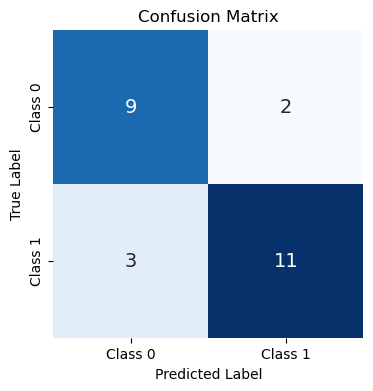

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predicted labels for the test set
y_pred = logisticReg.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix
# Create a heatmap of the confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5], labels=["Class 0", "Class 1"])
plt.yticks(ticks=[0.5, 1.5], labels=["Class 0", "Class 1"])
plt.show()


#### Classification_report
A classification report is a table that summarizes the performance of a classification model. It contains the following information:

* Accuracy: The overall accuracy of the model.
* Precision: The proportion of true positives out of all positive predictions.
* Recall: The proportion of true positives out of all actual positives.
* F1 score: A weighted average of precision and recall.
* Support: The number of instances in each class.

The classification report is a useful tool for evaluating the performance of a classification model. It can help to identify the strengths and weaknesses of the model, and to make decisions about how to improve the model.

In [78]:
from sklearn.metrics import classification_report

# Get predicted labels for the test set
y_pred = logisticReg.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])

# Print the classification report
print(report)


              precision    recall  f1-score   support

     Class 0       0.75      0.82      0.78        11
     Class 1       0.85      0.79      0.81        14

    accuracy                           0.80        25
   macro avg       0.80      0.80      0.80        25
weighted avg       0.80      0.80      0.80        25



Class 0:

Precision: Precision for Class 0 is 1.00, which means that when the model predicts an instance to be in Class 0, it's correct 100% of the time.

Recall: Recall for Class 0 is 0.77, indicating that the model is able to correctly identify 77% of the actual instances that belong to Class 0.

F1-Score: The F1-score for Class 0 is 0.87, which is the harmonic mean of precision and recall. It provides a balance between the two metrics.

Support: The number of instances in Class 0 is 13.
Class 1:


Precision: Precision for Class 1 is 0.80, which means that when the model predicts an instance to be in Class 1, it's correct 80% of the time.

Recall: Recall for Class 1 is 1.00, indicating that the model is able to correctly identify all of the actual instances that belong to Class 1.

F1-Score: The F1-score for Class 1 is 0.89, providing a balance between precision and recall for this class.
Support: The number of instances in Class 1 is 12.
Accuracy:

Accuracy: Overall accuracy of the model is 0.88, meaning that the model correctly predicts the class for 88% of the instances in the dataset.
Macro Average:

Macro Average Precision, Recall, F1-Score: These are the averages of precision, recall, and F1-score calculated for each class individually. They give equal weight to each class.
Weighted Average:

Weighted Average Precision, Recall, F1-Score: These are the weighted averages of precision, recall, and F1-score calculated based on the support for each class. They provide a balanced measure when the classes are imbalanced.


Create an ROC Curve for the model Using both the training and test sets

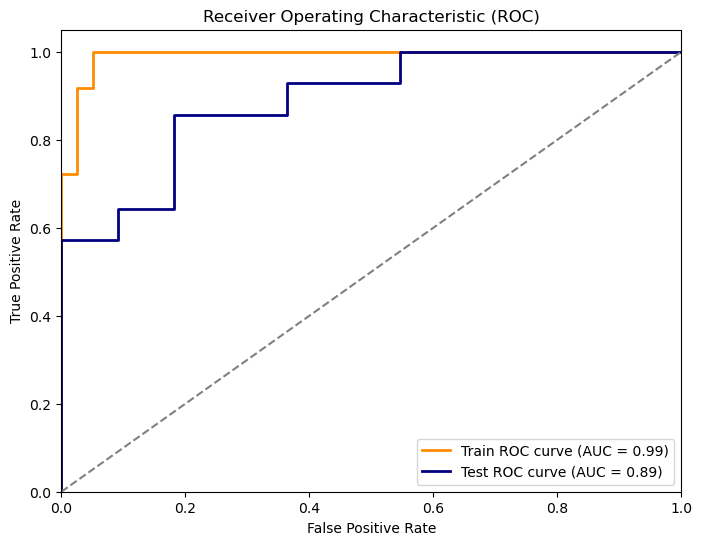

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for both training and test sets
y_train_probs = logisticReg.predict_proba(X_train)[:, 1]
y_test_probs = logisticReg.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves for both training and test sets
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC curve (AUC = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='navy', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

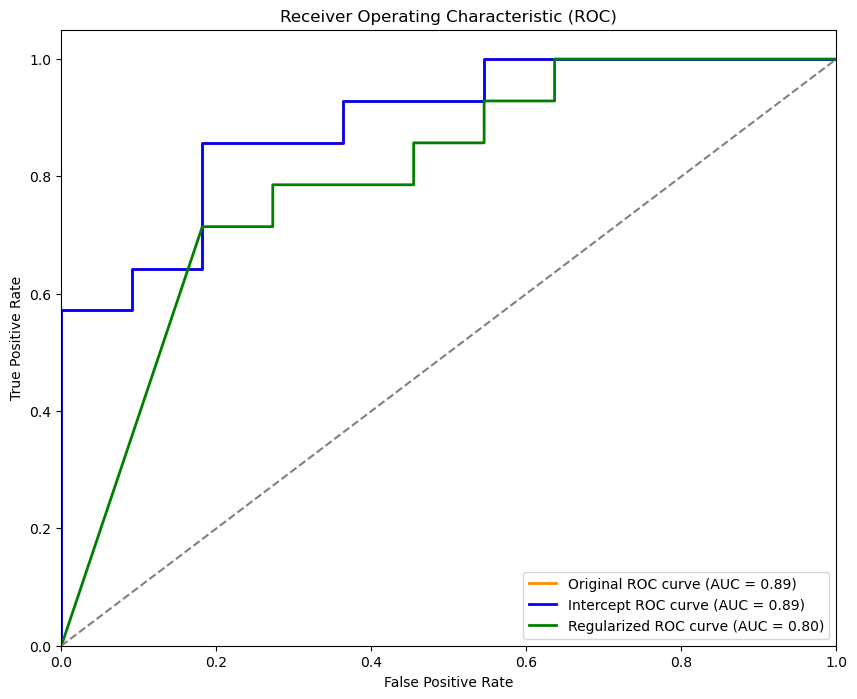

In [80]:
from sklearn.metrics import roc_curve, auc

# Original Model
logisticReg_original = LogisticRegression()
model_original = logisticReg_original.fit(X_train, y_train)

# Model with Interceptor
logisticReg_intercept = LogisticRegression(fit_intercept=True)
model_intercept = logisticReg_intercept.fit(X_train, y_train)

# Model with Regularization (large C)
logisticReg_regularized = LogisticRegression(C=1e16)
model_regularized = logisticReg_regularized.fit(X_train, y_train)

# Get predicted probabilities for all three models
y_test_probs_original = logisticReg_original.predict_proba(X_test)[:, 1]
y_test_probs_intercept = logisticReg_intercept.predict_proba(X_test)[:, 1]
y_test_probs_regularized = logisticReg_regularized.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for all three models
fpr_original, tpr_original, _ = roc_curve(y_test, y_test_probs_original)
roc_auc_original = auc(fpr_original, tpr_original)

fpr_intercept, tpr_intercept, _ = roc_curve(y_test, y_test_probs_intercept)
roc_auc_intercept = auc(fpr_intercept, tpr_intercept)

fpr_regularized, tpr_regularized, _ = roc_curve(y_test, y_test_probs_regularized)
roc_auc_regularized = auc(fpr_regularized, tpr_regularized)

# Plot ROC curves for all three models on the same graph
plt.figure(figsize=(10, 8))
plt.plot(fpr_original, tpr_original, color='darkorange', lw=2, label='Original ROC curve (AUC = %0.2f)' % roc_auc_original)
plt.plot(fpr_intercept, tpr_intercept, color='blue', lw=2, label='Intercept ROC curve (AUC = %0.2f)' % roc_auc_intercept)
plt.plot(fpr_regularized, tpr_regularized, color='green', lw=2, label='Regularized ROC curve (AUC = %0.2f)' % roc_auc_regularized)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## 6. Random Forest Regression Model
Random Forest model would learn patterns from the features in X to predict the target values in y. By using multiple decision trees and aggregating their predictions, the Random Forest aims to provide more accurate and robust predictions while reducing overfitting.

In [81]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor


# Create a Random Forest regressor with specified parameters
rf_model = RandomForestRegressor()

# Fit the Random Forest model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Model evaluation for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf= np.sqrt(mse_rf)

print("Random Forest - Mean Absolute Error:", mae_rf)
print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - Root Mean Squared Error:", rmse_rf)
print('R-sq score:', r2_score(y_test,y_pred_rf))

Random Forest - Mean Absolute Error: 0.17079999999999998
Random Forest - Mean Squared Error: 0.076788
Random Forest - Root Mean Squared Error: 0.27710647773013175
R-sq score: 0.6883603896103896


# Conclusions
1. The best performing model was selected based on the mse and rmse values which makes the random forest model be the best performing mmodel. 

    * Random Forest - Mean Absolute Error: 0.09040000000000001
    
    * Random Forest - Mean Squared Error: 0.044871999999999995

2. When the temperature gets higher from a degree of 35 to 50 there is an increase in cab prices caused by higher demand

3. When there is low rainfall the prices are  higher due to high demand compared to when there is high rainfall

4. Uber is preferred to Lyft

5. An increase in distance contributes to an increase in price in  the different cab types

# Recommendations

1. Lyft should do more marketing so that more people are aware of it and order more of the cabs.

2. Both Uber and Lyft should continue using their dynamic pricing strategies(surge pricing), based on factors like weather conditions, demand-supply ratios, and time of day.

3. Creating loyalty programs to attract and maintain customers.

4. Customizing a customer's travel experience.
